In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

Importing data drom csv files

In [3]:
# Importing ε1 and ε2 values (from lumerical)
e_1 = pd.read_csv('/Users/arpi/data/lumerical_sapphire/e1.csv', header=None)
e_2 = pd.read_csv('/Users/arpi/data/lumerical_sapphire/e23.csv', header=None)




#importing n and k (from palik) 
n_palik= pd.read_csv('/Users/arpi/data/palik_sapphire/n_palik.csv', header=None)
k_palik= pd.read_csv('/Users/arpi/data/palik_sapphire/k_palik.csv', header=None)


#importing the k value that's from both palik and lumerical
k_new = pd.read_csv('/Users/arpi/data/kappa_fusion.csv', header=None)

#importing measured sapphire transmission curve
trans_sapphire= pd.read_csv('/Users/arpi/data/sapphire_t_curve.csv', header=None)

#importing data from crystran
crystran_1 = pd.read_csv('/Users/arpi/data/crystran_sapphire/crystran_sapphire_1mm.csv', header = None)
crystran_10 = pd.read_csv('/Users/arpi/data/crystran_sapphire/crystran_sapphire_10mm.csv', header = None)









Extracting data from the data frames and defining variables:

In [4]:

#Permittivity
e1 = e_1[1]
e2 = e_2[0]

#n and k from lumerical
n_l = (1 / (2 ** 0.5)) * (np.sqrt(e1 + (np.sqrt((e1 ** 2) + (e2 ** 2)))))

k_l = e2 / n_l

#defining wavelength (1micron - 10 micron) (converting from nm to um)
x_l=e_1[0]/1000


#n and k from palik
n_p = n_palik[1]
k_p = k_palik[1]

#k from both palik and lumerical
k_f = k_new[1]
#wavelength from palik
x_p = n_palik[0].astype('float64')


#wavelength and transmission of measured sapphire
wavelength = trans_sapphire[0]
transmission= trans_sapphire[1]/100

#Wavelength and transmission of data from crystran
T_c_1 = crystran_1[1]/100
W_c_1 = crystran_1[0]

T_c_10 = crystran_10[1]/100
W_c_10 = crystran_10[0]


Plotting n and k

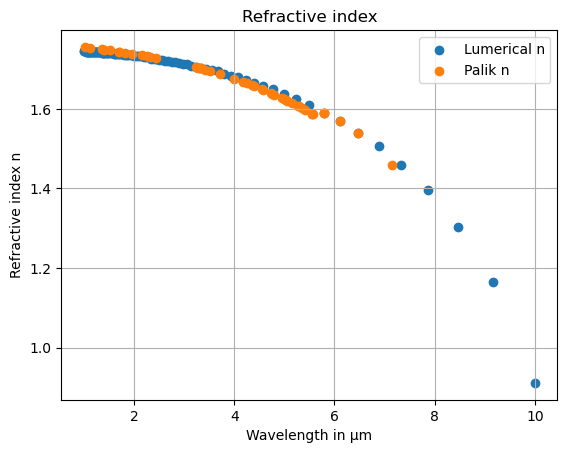

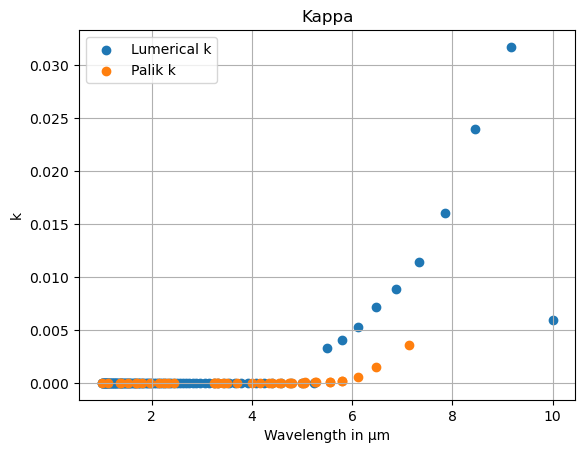

In [5]:
plt.scatter(x_l, n_l, label='Lumerical n')
plt.scatter(x_p,n_p,label='Palik n')
plt.xlabel('Wavelength in μm')
plt.ylabel('Refractive index n')
plt.title('Refractive index')
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(x_l, k_l, label='Lumerical k')
plt.scatter(x_p, k_p, label='Palik k')
#plt.scatter(x_l,k_f,label='Fusion')
plt.xlabel('Wavelength in μm')
plt.ylabel('k')
plt.title('Kappa')
plt.legend()
plt.grid(True)
plt.show()


Calculating R

In [6]:
#Lumerical

# Calculating R1
R_1l = ((n_l - 1) ** 2) + (k_l ** 2)

# Calculating R_2 using vectorized operations
R_2l = ((n_l + 1) ** 2) + (k_l ** 2)

# Calculating R using vectorized operations
R_l = R_1l / R_2l







#Palik
# Calculating R1
R_1p = ((n_p - 1) ** 2) + (k_p ** 2)

# Calculating R_2 using vectorized operations
R_2p = ((n_p + 1) ** 2) + (k_p ** 2)

# Calculating R using vectorized operations
R_p = R_1p / R_2p





#Fusion
# Calculating R1
R_1f = ((n_l - 1) ** 2) + (k_f ** 2)

# Calculating R_2 using vectorized operations
R_2f = ((n_l + 1) ** 2) + (k_f ** 2)

# Calculating R using vectorized operations
R_f = R_1f / R_2f





Calculating absorption coefficient a

In [7]:
#lumerical

a_l = ((4 * math.pi * k_l) / x_l) * 1000000



#palik

a_p = ((4 * math.pi * k_p) / x_p) * 1000000



#Fusion

a_f = ((4 * math.pi * k_f) / x_l) * 1000000





Calculating the rest of the variables

In [8]:
#thickness of the sample 10mm=0.01m

l_10 = 0.01
l_5 = 0.005
l_1 = 0.001






#defining p=α*l

#lumerical
p_l = a_l * l_10
p_ll = a_l * l_1


#palik

#trying with different thicknesses
p_p10 = a_p * l_10
p_p5 = a_p * l_5
p_p1 = a_p * l_1



#fusion
p_f = a_f * l_10




#defining exp(-αl)

#lumerical
o_l = np.exp(-p_l)
o_l1 = np.exp (-p_ll)

#palik
o_p10 = np.exp(-p_p10)
o_p5 = np.exp(-p_p5)
o_p1 = np.exp(-p_p1)


#fusion
o_f = np.exp(-p_f)











Transmission

In [9]:
#Lumerical

T1l=((1-R_l)**2)*o_l

T2l=1-((R_l**2)*(o_l**2))

T_l=T1l/T2l


#1mm

T1l1=((1-R_p)**2)*o_l1






#Palik

#10 mm

T1p10=((1-R_p)**2)*o_p10

T2p10=1-((R_p**2)*(o_p10**2))

T_p10=T1p10/T2p10

#5 mm


T1p5=((1-R_p)**2)*o_p5

T2p5=1-((R_p**2)*(o_p5**2))

T_p5=T1p5/T2p5

#1mm

T1p1=((1-R_p)**2)*o_p1

T2p1=1-((R_p**2)*(o_p1**2))

T_p1=T1p1/T2p1


#Fusion
T1f=((1-R_f)**2)*o_f

T2f=1-((R_f**2)*(o_f**2))

T_f=T1f/T2f




Plotting transmission

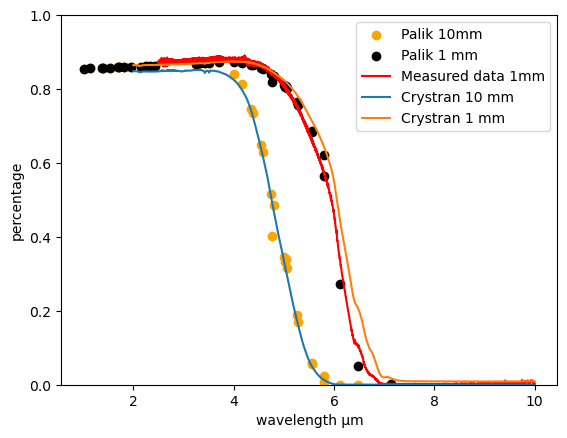

In [10]:
#plt.scatter(x_l,T1l, c='green' ,label = 'Lumerical ')
plt.scatter(x_p,T1p10, c='orange',label = 'Palik 10mm')
#plt.scatter(x_p,T1p5, c='blue',label = 'Palik 5 mm')
plt.scatter(x_p,T1p1, c='black',label = 'Palik 1 mm')
#plt.scatter(x_l,T1l1, c='pink',label = 'Lumerical 1 mm')
#plt.scatter(x_l,T1f, label = 'Fusion T= (1-R)^2*exp(-al) ')
plt.plot(wavelength,transmission, c='red', label = 'Measured data 1mm')
plt.plot(W_c_10,T_c_10, label = 'Crystran 10 mm')
plt.plot(W_c_1,T_c_1, label = 'Crystran 1 mm')
#plt.plot(x1,T2, label = 'T = (1-R)/(1+R)')
plt.xlabel('wavelength μm')
plt.ylabel('percentage')
#plt.plot(x,A, label = 'A')
#plt.plot(x,K, label = 'K')
plt.ylim(0, 1)
plt.legend()

(1.0, 10.0)

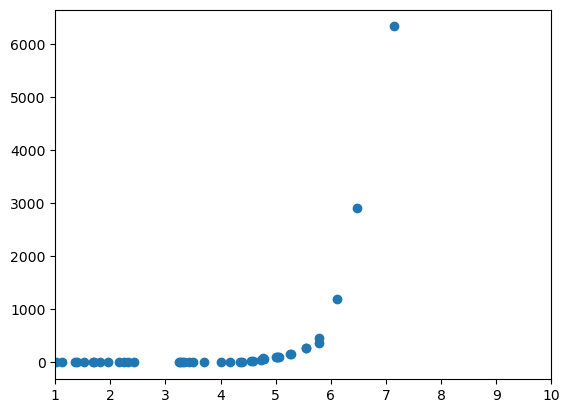

In [11]:
plt.scatter(x_p, a_p)
#plt.scatter(x_l, a_l)
plt.xlim(1,10)

(0.0, 10.0)

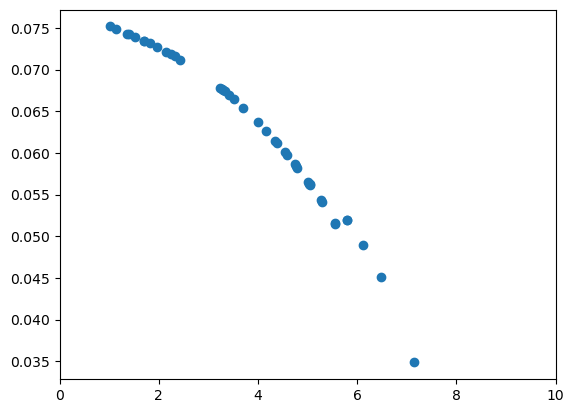

In [12]:
plt.scatter(x_p, R_p)
plt.xlim(0,10,100)

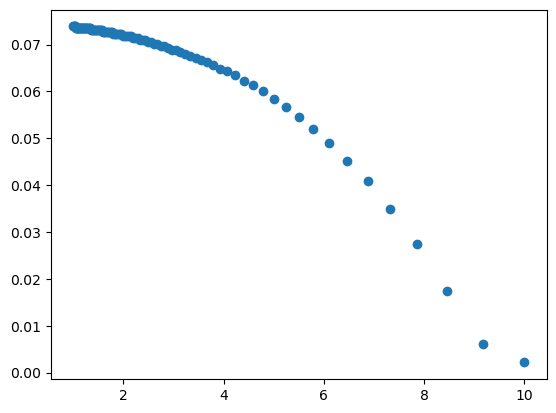

In [13]:
plt.scatter(x_l,R_l)

In [14]:
def wavelength_to_frequency(wavelength_micron):
    # Speed of light in meters per second
    speed_of_light = 3e8
    
    # Convert wavelength from micrometers to meters
    wavelength_meter = wavelength_micron * 1e-6
    
    # Calculate frequency in Hertz
    frequency_hz = speed_of_light / wavelength_meter
    
    # Convert frequency from Hertz to terahertz
    frequency_thz = frequency_hz / 1e12
    
    return frequency_thz

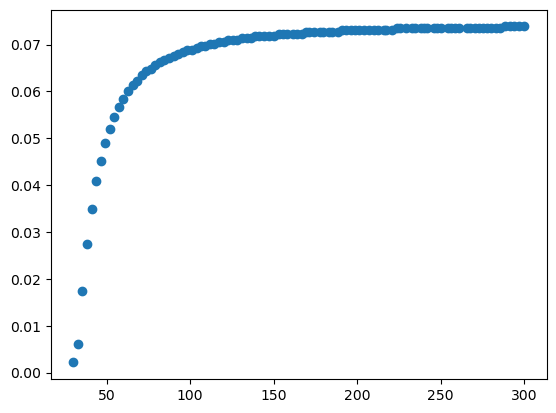

In [15]:
wavelengths_micron = [0.5, 0.6, 0.7, 0.8]  # Replace with your array of wavelengths
frequencies_thz = [wavelength_to_frequency(wavelength) for wavelength in x_l]

plt.scatter(frequencies_thz, R_l)


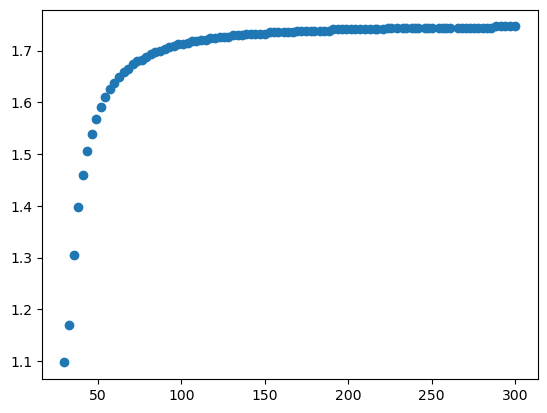

In [16]:
sqrt_R_l = np.sqrt(R_l)
e_r  = ((sqrt_R_l + 1)/ (1 - sqrt_R_l))
plt.scatter(frequencies_thz , e_r)
